In [150]:
library(beeswarm)

ns=c(25,25)
#ns=c(30,30)

conf.coeff=0.95  # 신뢰계수

x=numeric()
type=numeric()

set.seed(1235)
for(i in 1:length(ns)){
  x=c(x, rnorm(ns[i], 172+(1-i)*5, 6))
  type = c(type, rep(LETTERS[i], ns[i]))
}

aov_res = aov(x~type) 
res = unlist(summary(aov_res))

mc_res = TukeyHSD(aov_res)

df = res[2]  # df = sum(n_i-1)
pooledSD = sqrt(res[6]) # pooledSE = sqrt(sum((n_i-1)*var(x_i))/df)
qtval = qtukey(p = conf.coeff, nmeans = res[1]+1, df = df)/sqrt(2)

sample_mean=aggregate(x, list(type), mean)
n=aggregate(x, list(type), length)$x
#moe = qtval*pooledSD*sqrt(1/n)/sqrt(2)
moe = qtval*pooledSD*sqrt(1/n)

xp=1:length(n)
xp=xp+0.2

moes=c(sample_mean$x-moe, sample_mean$x+moe)
min=min(x)
max=max(x)
addmargin=(max-min)/20

par(mar = c(5,10,2,10))
yrange=c(150,190)

par(bty="l")
plot(yrange, type="n", axes=FALSE, xaxt="n", xlim=c(0.5, length(xp)+0.5), main="", xlab="population", ylab="height" )
axis(1, 1:length(xp), labels=sample_mean$Group.1)
axis(2)

arrows(xp, sample_mean$x-moe, xp, sample_mean$x+moe, angle=90, code=3, length=0.1)  # 각 평균에 대한 신뢰구간
points(xp, sample_mean$x, pch=18, col=2)
lines(c(xp[2], 3), c(sample_mean$x[2], sample_mean$x[2]), lty=3)

beeswarm(x~type, method="center", col = 1:length(n), ylim=yrange, side=-1, xlab="",
         main = '', add=TRUE)

par(new=TRUE)

diff=sample_mean$x[1]-sample_mean$x[2]

two=t.test(x~type, conf.level=conf.coeff, var.equal=TRUE)

ypos=c(diff, two$conf.int[1], two$conf.int[2])
xpos=rep(0.95, 3)

pv=round(two$p.value,3)
plot(xpos[1], diff, axes=FALSE, type="n", xlim=c(0,1), ylim=yrange-sample_mean$x[2], xlab=NA, ylab=NA, main=paste("95% 신뢰구간,  p-value=", pv))
arrows(xpos, two$conf.int[1], xpos, two$conf.int[2], angle=30, code=3, length=0.1)  # 차이에 대한 신뢰구간
points(xpos[1], diff, pch=18, col="blue")
axis(side=4, at=seq(-10,10,5))

ERROR: Error in library(beeswarm): ‘beeswarm’이라고 불리는 패키지가 없습니다


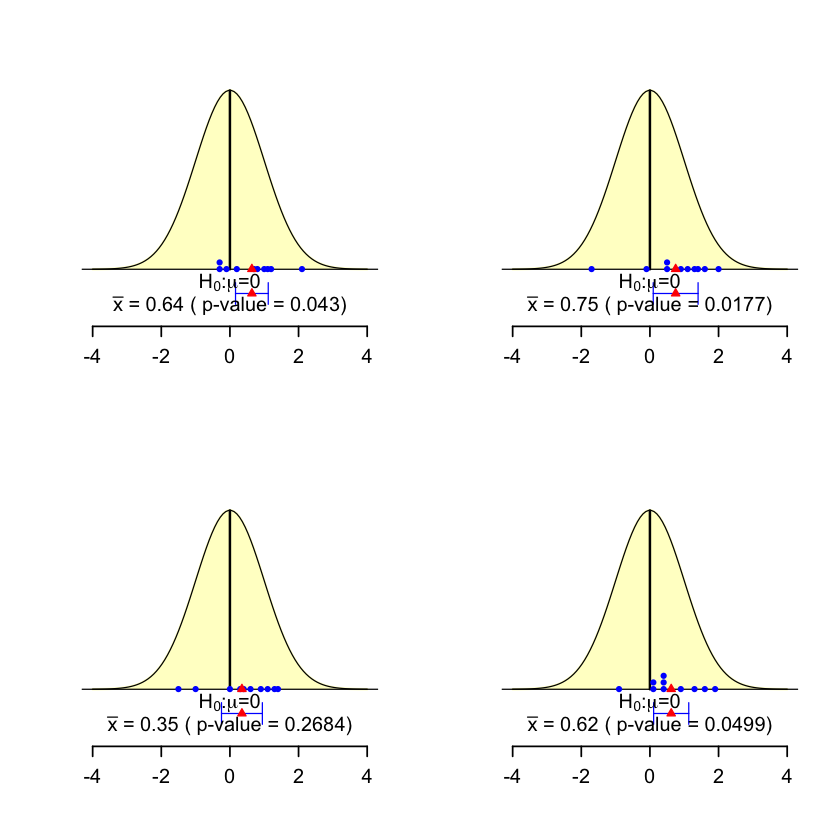

In [1]:
par(mfrow=c(2,2))
par(bg = "white", col.axis = "white", col.lab = "white", col.main = "white", 
    col.sub = "white", xaxt = "s", yaxt = "s", bty = "n")

x <- seq(-4, 4, length=100)
y <- dnorm(x, mean=0, sd=1)
set.seed(1)  

############################################################################

sample_data <- round(rnorm(10, mean=0.5, sd=1), 1) 

plot(x, y, xlim=c(-4,4),ylim=c(-0.09,max(y)),type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)
lines(x, y, col="black", lwd=1)
segments(0, 0, 0, max(y), col="black", lwd=2)
abline(h=0, lty=1, col="black")
stripchart(sample_data, add=TRUE,pch=16, col="Blue",method="stack",at=0.0004)
stripchart(sum(sample_data)/10, add=TRUE,pch=24,bg="red", col="red",method="stack",at=0.0004)

mean_bar = mean(sample_data)
n <- length(sample_data)
sigma <- 1
mu_0 <- 0
s <- sd(sample_data)  

alpha <- 0.05 
df <- length(sample_data) - 1
z_alpha <- qnorm(1 - alpha / 2) 
lower_bound <- mean_bar - z_alpha * (s / sqrt(length(sample_data))) 
upper_bound <- mean_bar + z_alpha * (s / sqrt(length(sample_data)))  

z_score <- (mean_bar - mu_0) / (sigma / sqrt(n))
p_value <- 2 * pnorm(-abs(z_score)) 
conf_interval = c(lower_bound,upper_bound)

arrows(conf_interval[1], -0.054, conf_interval[2], -0.054, code = 3, angle=90,length=0.09,col = "blue")
stripchart(sum(sample_data)/10,at=-0.054,add=TRUE,pch=24,bg="red", col="red",method="stack")

text(0, -0.02, cex=1.2,expression(H[0] * ":" * mu * "=0"), adj = c(0.5, 0.7))
text(0, -0.08, substitute(paste(bar(x), " = ", mean_bar, " ( p-value = ", p_value, ")"), 
                          list(mean_bar=round(mean_bar,2), p_value=round(p_value,4))), cex=1.2)

axis(side = 1, at = seq(-4, 4, by=2), labels =seq(-4, 4, by=2),cex.axis=1.2,lwd=1.4,line=0.4, col.axis="black")

############################################################################

sample_data <- round(rnorm(10, mean=0.5, sd=1), 1)  

plot(x, y, xlim=c(-4,4),ylim=c(-0.09,max(y)),type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)
lines(x, y, col="black", lwd=1)
segments(0, 0, 0, max(y), col="black", lwd=2)
abline(h=0, lty=1, col="black")
stripchart(sample_data, add=TRUE,pch=16, col="Blue",method="stack",at=0.0004)
stripchart(sum(sample_data)/10, add=TRUE,pch=24,bg="red", col="red",method="stack",at=0.0004)

mean_bar = mean(sample_data)
n <- length(sample_data)
sigma <- 1
mu_0 <- 0
s <- sd(sample_data)  

alpha <- 0.05 
df <- length(sample_data) - 1
z_alpha <- qnorm(1 - alpha / 2) 
lower_bound <- mean_bar - z_alpha * (s / sqrt(length(sample_data))) 
upper_bound <- mean_bar + z_alpha * (s / sqrt(length(sample_data)))  

z_score <- (mean_bar - mu_0) / (sigma / sqrt(n))
p_value <- 2 * pnorm(-abs(z_score)) 
conf_interval = c(lower_bound,upper_bound)

arrows(conf_interval[1], -0.054, conf_interval[2], -0.054, code = 3, angle=90,length=0.09,col = "blue")
stripchart(sum(sample_data)/10,at=-0.054,add=TRUE,pch=24,bg="red", col="red",method="stack")

text(0, -0.02, cex=1.2,expression(H[0] * ":" * mu * "=0"), adj = c(0.5, 0.7))
text(0, -0.08, substitute(paste(bar(x), " = ", mean_bar, " ( p-value = ", p_value, ")"), 
                          list(mean_bar=round(mean_bar,2), p_value=round(p_value,4))), cex=1.2)

axis(side = 1, at = seq(-4, 4, by=2), labels =seq(-4, 4, by=2),cex.axis=1.2,lwd=1.4,line=0.4, col.axis="black")

############################################################################

sample_data <- round(rnorm(10, mean=0.5, sd=1), 1)  

plot(x, y, xlim=c(-4,4),ylim=c(-0.09,max(y)),type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)
lines(x, y, col="black", lwd=1)
segments(0, 0, 0, max(y), col="black", lwd=2)
abline(h=0, lty=1, col="black")
stripchart(sample_data, add=TRUE,pch=16, col="Blue",method="stack",at=0.0004)
stripchart(sum(sample_data)/10, add=TRUE,pch=24,bg="red", col="red",method="stack",at=0.0004)

mean_bar = mean(sample_data)
n <- length(sample_data)
sigma <- 1
mu_0 <- 0
s <- sd(sample_data)  

alpha <- 0.05 
df <- length(sample_data) - 1
z_alpha <- qnorm(1 - alpha / 2) 
lower_bound <- mean_bar - z_alpha * (s / sqrt(length(sample_data))) 
upper_bound <- mean_bar + z_alpha * (s / sqrt(length(sample_data)))  

z_score <- (mean_bar - mu_0) / (sigma / sqrt(n))
p_value <- 2 * pnorm(-abs(z_score)) 
conf_interval = c(lower_bound,upper_bound)

arrows(conf_interval[1], -0.054, conf_interval[2], -0.054, code = 3, angle=90,length=0.09,col = "blue")
stripchart(sum(sample_data)/10,at=-0.054,add=TRUE,pch=24,bg="red", col="red",method="stack")

text(0, -0.02, cex=1.2,expression(H[0] * ":" * mu * "=0"), adj = c(0.5, 0.7))
text(0, -0.08, substitute(paste(bar(x), " = ", mean_bar, " ( p-value = ", p_value, ")"), 
                          list(mean_bar=round(mean_bar,2), p_value=round(p_value,4))), cex=1.2)

axis(side = 1, at = seq(-4, 4, by=2), labels =seq(-4, 4, by=2),cex.axis=1.2,lwd=1.4,line=0.4, col.axis="black")

############################################################################

sample_data <- round(rnorm(10, mean=0.5, sd=1), 1)  

plot(x, y, xlim=c(-4,4),ylim=c(-0.09,max(y)),type="l", lwd=2, col="#FFFFCC", xaxt='n', yaxt='n', xlab="", ylab="")
polygon(c(x, rev(x)), c(y, rep(0, length(y))), col="#FFFFCC", border=NA)
lines(x, y, col="black", lwd=1)
segments(0, 0, 0, max(y), col="black", lwd=2)
abline(h=0, lty=1, col="black")
stripchart(sample_data, add=TRUE,pch=16, col="Blue",method="stack",at=0.0004)
stripchart(sum(sample_data)/10, add=TRUE,pch=24,bg="red", col="red",method="stack",at=0.0004)

mean_bar = mean(sample_data)
n <- length(sample_data)
sigma <- 1
mu_0 <- 0
s <- sd(sample_data)  

alpha <- 0.05 
df <- length(sample_data) - 1
z_alpha <- qnorm(1 - alpha / 2) 
lower_bound <- mean_bar - z_alpha * (s / sqrt(length(sample_data))) 
upper_bound <- mean_bar + z_alpha * (s / sqrt(length(sample_data)))  

z_score <- (mean_bar - mu_0) / (sigma / sqrt(n))
p_value <- 2 * pnorm(-abs(z_score)) 
conf_interval = c(lower_bound,upper_bound)

arrows(conf_interval[1], -0.054, conf_interval[2], -0.054, code = 3, angle=90,length=0.09,col = "blue")
stripchart(sum(sample_data)/10,at=-0.054,add=TRUE,pch=24,bg="red", col="red",method="stack")

text(0, -0.02, cex=1.2,expression(H[0] * ":" * mu * "=0"), adj = c(0.5, 0.7))
text(0, -0.08, substitute(paste(bar(x), " = ", mean_bar, " ( p-value = ", p_value, ")"), 
                          list(mean_bar=round(mean_bar,2), p_value=round(p_value,4))), cex=1.2)

axis(side = 1, at = seq(-4, 4, by=2), labels =seq(-4, 4, by=2),cex.axis=1.2,lwd=1.4,line=0.4, col.axis="black")
